# **Import Libraries and data**

---



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Task_4_SHAI/emnist_balanced_train.csv",header=None)
test = pd.read_csv("/content/drive/MyDrive/Task_4_SHAI/emnist_balanced_test.csv",header=None)
class_mapping = '0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt' #from  https://arxiv.org/pdf/1702.05373.pdf

#**Exploratory Data Analysis**

---



In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(112800, 785)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112800 entries, 0 to 112799
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 675.6 MB


In [ ]:
df[0].nunique()

47

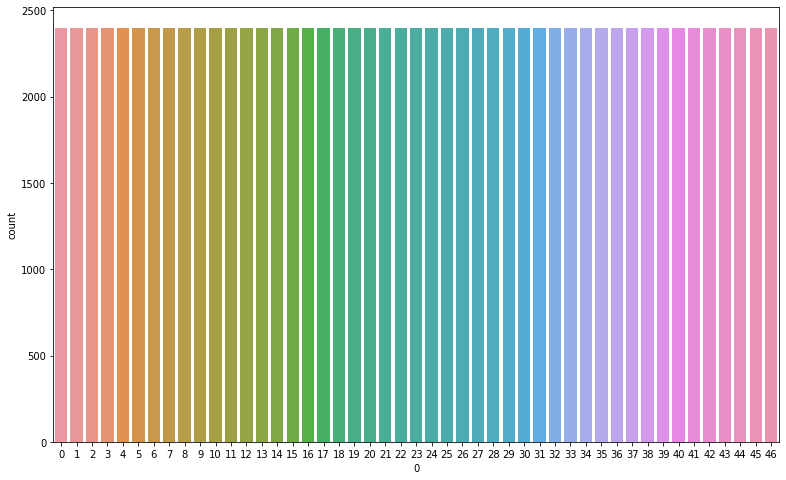

In [ ]:
plt.figure(figsize = (13,8))
sns.countplot(x=0,data=df)

In [ ]:
df.iloc[0]

0      45
1       0
2       0
3       0
4       0
       ..
780     0
781     0
782     0
783     0
784     0
Name: 0, Length: 785, dtype: int64

In [ ]:
y_train= df.iloc[:,0].values
X_train=df.iloc[:,1:].values
y_test= test.iloc[:,0].values
X_test=test.iloc[:,1:].values
y_test

array([41, 39,  9, ...,  1, 26, 33])

45


'r'

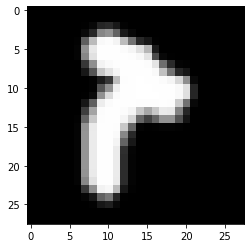

In [ ]:
plt.imshow(X_train[0].reshape([28,28]) ,cmap='Greys_r')
print(y_train[0])
class_mapping[y_train[0]]

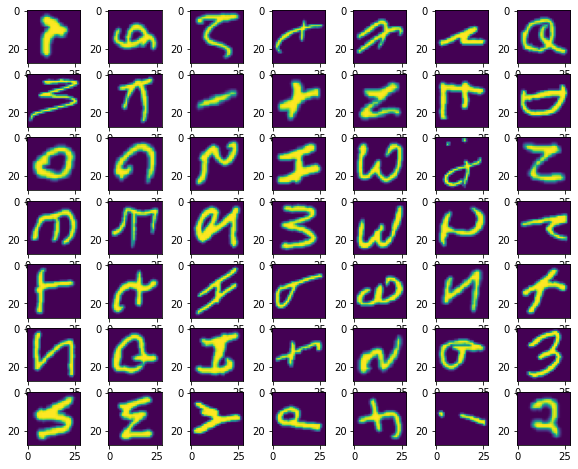

In [ ]:
import matplotlib.pyplot as plt 
fig,axes = plt.subplots(7,7,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape([28,28]))

#**Preprocesssing for Data**

---



**Normalisation and reshaping of data**

for less complex model.¶

In [ ]:
def normalisation_data(X):
  # Normalise and reshape data
    train_images = X / 255.0
    train_images_number = train_images.shape[0]
    train_images_height = 28
    train_images_width = 28
    train_images_size = train_images_height*train_images_width

    train_images = train_images.reshape(train_images_number, train_images_size)
    print(train_images.shape)
    return(train_images)


In [ ]:
X_train =normalisation_data(X_train)
X_test = normalisation_data(X_test)

(112800, 784)
(18800, 784)


In [ ]:
y_train

array([45, 36, 43, ..., 23, 31,  8])

for compare with outpot softmax function
(the activition function in outpot layer)

In [ ]:
# number_of_classes = 47
# # y_train = tf.keras.utils.to_categorical(y_train, number_of_classes)
# y_test = tf.keras.utils.to_categorical(y_test, number_of_classes)
# # y_train[2]

# **Build Neural Network** 

---



In [ ]:
import tensorflow as tf
from tensorflow import keras


### simple neural network with no hidden layers

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(47, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


Epoch 1/5
3525/3525 [==============================] - 7s 2ms/step - loss: 1.3836 - accuracy: 0.6309
Epoch 2/5
3525/3525 [==============================] - 6s 2ms/step - loss: 1.1646 - accuracy: 0.6817
Epoch 3/5
3525/3525 [==============================] - 6s 2ms/step - loss: 1.1350 - accuracy: 0.6914
Epoch 4/5
3525/3525 [==============================] - 6s 2ms/step - loss: 1.1204 - accuracy: 0.6947
Epoch 5/5
3525/3525 [==============================] - 6s 2ms/step - loss: 1.1073 - accuracy: 0.7001


In [ ]:
model.evaluate(X_test, y_test)

588/588 [==============================] - 1s 1ms/step - loss: 1.1787 - accuracy: 0.6822


[1.1786830425262451, 0.6822340488433838]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(47, 47), dtype=int32, numpy=
array([[174,   0,   0, ...,   0,   0,   0],
       [  0, 276,   0, ...,   1,   2,   5],
       [  0,   0, 261, ...,   1,   0,   0],
       ...,
       [  0,   0,   0, ..., 117,   2,  10],
       [  0,   0,   0, ...,   1, 311,   8],
       [  0,   3,   0, ...,   3,  14, 239]], dtype=int32)>

## Using hidden layer

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(47, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
3525/3525 [==============================] - 8s 2ms/step - loss: 1.1367 - accuracy: 0.6783
Epoch 2/5
3525/3525 [==============================] - 7s 2ms/step - loss: 0.7167 - accuracy: 0.7803
Epoch 3/5
3525/3525 [==============================] - 7s 2ms/step - loss: 0.6140 - accuracy: 0.8058
Epoch 4/5
3525/3525 [==============================] - 7s 2ms/step - loss: 0.5605 - accuracy: 0.8191
Epoch 5/5
3525/3525 [==============================] - 8s 2ms/step - loss: 0.5272 - accuracy: 0.8283


In [ ]:
model.evaluate(X_test, y_test)

588/588 [==============================] - 1s 1ms/step - loss: 0.6115 - accuracy: 0.8056


[0.6114718317985535, 0.805638313293457]

# **CNN model**

In [ ]:
model = tf.keras.Sequential([ 
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(47,activation='sigmoid')
])


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 5408)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               2769408   
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 dense_11 (Dense)            (None, 47)                6063      
                                                      

In [ ]:
number_of_classes = 47
y_train = tf.keras.utils.to_categorical(y_train, number_of_classes)
y_test = tf.keras.utils.to_categorical(y_test, number_of_classes)
y_train[2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
                   
model.fit(X_train,y_train,
        
          verbose=1,
          epochs=25)

Epoch 1/25


ValueError: ignored

In [ ]:
# df[0]